In [3]:
import pandas as pd
import numpy as np

In [4]:
from pandas import Series
def customDescribe(x):
    data = [x.mean(), x.std(), x.min(), x.quantile(0.25), x.median(), 
            x.quantile(0.75), x.max(), x.skew(), x.kurtosis(), x.mode().max(), x.isnull().sum()]
    names = ['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis', 'mode', 'NAs']
    return Series(data, index=names)

names = pd.read_csv('columns.csv')
df = pd.read_csv('responses.csv')
music = df.iloc[:,2:18]
music.apply(customDescribe)

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance"
mean,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983
std,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,1.301105,1.375677,1.214434,1.257936,1.237269,1.347173,1.327902,1.324099
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
skewness,-0.045760,0.694783,0.795798,0.107357,0.219951,-0.383317,-0.702586,0.604915,0.441427,0.037217,0.156497,0.146457,-0.108936,0.162211,0.188489,0.569644
kurtosis,-0.803331,-0.216416,-0.037576,-0.969287,-0.928080,-0.704309,-0.419187,-0.934732,-0.959379,-1.250059,-0.900509,-0.997739,-0.917436,-1.129404,-1.099347,-0.906037
mode,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,5.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000


In [5]:
music = music.dropna()

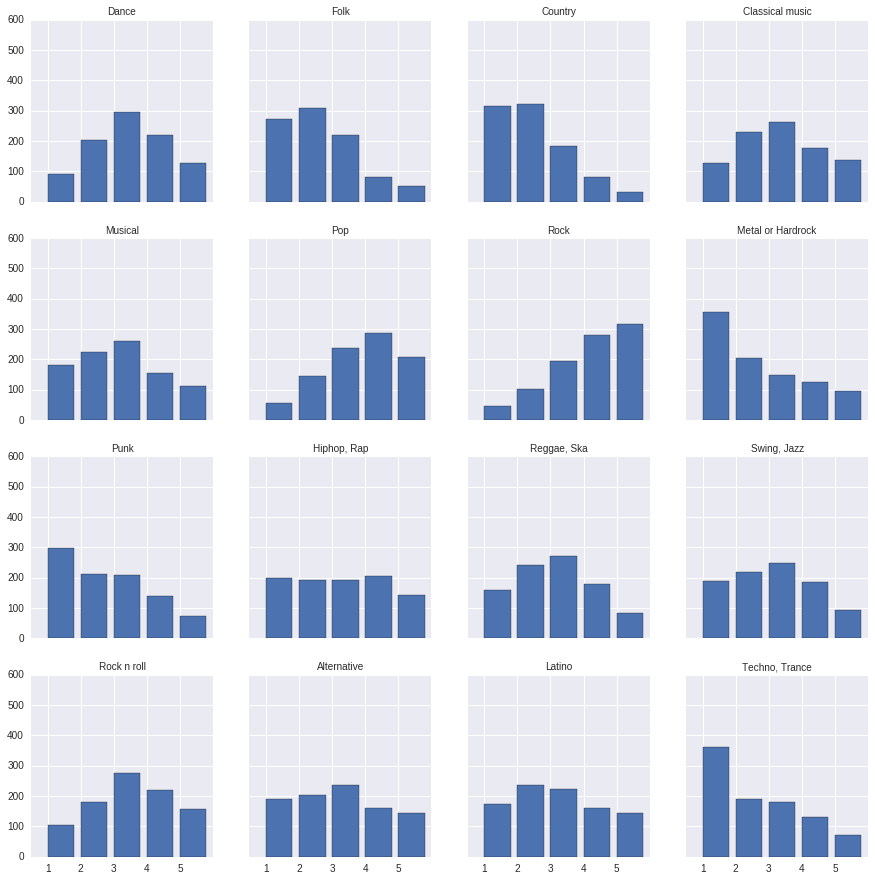

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt_dict = {}

for i in range(0,len(music.columns)):
    plt_dict.update({i:music.columns[i]})

fig, ax = plt.subplots(4,4,figsize=(15,15), sharey=True, sharex=True)
x = [1,2,3,4,5]
initial = 0

for i in range(4):
    for j in range(4):
        y = music[plt_dict[initial]].value_counts().to_dict()
        ax[i,j].bar(y.keys(), y.values())
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        ax[i,j].set_xticklabels(labels=np.arange(0,6), fontsize=10)
        ax[i,j].set_yticklabels(labels=np.arange(0,601,100), fontsize=10)
        ax[i,j].set_title(plt_dict[initial], fontsize=10)
        ax[i,j].set_xlim(.5,6)
        ax[i,j].set_ylim(0,600)
        initial += 1
plt.show()

In [14]:
from scipy.stats.mstats import normaltest
import scipy

normaltest(music).pvalue

array([  1.73933578e-018,   9.70589103e-015,   9.08852599e-018,
         3.03938325e-039,   1.85007144e-036,   1.81645640e-017,
         1.15204030e-016,   6.09948269e-042,   3.13553153e-039,
         2.84113677e-210,   7.36973614e-024,   2.01589772e-045,
         2.74815258e-029,   1.90506599e-087,   1.42014654e-076,
         2.82482142e-037])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = music.corr() #попарная корреляция Пиросона 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmax=.8, square=True)
plt.show()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import FactorAnalysis

n_features = len(music.columns)
n_components = np.arange(0, 4)
fa_scores = []
fa = FactorAnalysis()
fa.fit(music)
for n in n_components:
    fa.n_components = n
    fa_scores.append(np.mean(cross_val_score(fa, music)))
n_components_fa = n_components[np.argmax(fa_scores)]
print('Количество факторов: ', n_components_fa)

In [ ]:
factor = FactorAnalysis(n_components=3)
factor.fit(music)
print ((pd.DataFrame(factor.components_,columns=music.columns)).transpose())